# S1: Introducción a R, tipos de objetos

Rodrigo García Manzanas: <rodrigo.manzanas@unican.es>

## ¿Qué es R?

* En 1976, John Chambers, Rick Becker y Allan Wilks desarrollaron *S* como un conjunto de macros Fortran, que se convirtieron en el entorno de análisis estadístico de Bell Labs.
* En 1988, se reescribió completamente S (S3) en código C. Diez años más tarde, en 1998, se lanzó la S4, que contenía un conjunto de características orientadas a objetos más avanzadas que las de S3. S4 (y su versión comercial S-Plus) siguen estando vigentes en la actualidad.
* En pocas palabras, R es un dialecto libre del lenguaje S, desarrollado en 1993 por Robert Gentleman y Ross Ihaka del departamento de Estadística de la Universidad de Auckland.
* Con varios millones de usuarios a nivel mundial, R se ha convertido rápidamente en uno de los lenguajes de programación líderes en estadística y ciencia de datos. Cada año, el número de usuarios de R crece en un 40%, y cada vez más organizaciones lo están usando para sus actividades cotidianas. Sus características básicas son:
  + software libre de código abierto -> desarrolladores de todo el mundo contribuyen con paquetes que permiten realizar análisis cada vez más específicos y sofisticados. No hay limitaciones.   
  + está en constante evolución y se dispone de una amplia documentación. Hay mucha información disponible en foros como *Stackoverflow*.
  + gran capacidad de gráficos para visualizar información compleja de una forma sencilla. 
  + muy flexible, puede trabajar con datos procedentes de todo tipo de archivos: .txt, .csv, JSON, etc.
* Existen múltiples guías para el aprendizaje y uso de R. Dos de las más populares son las siguientes:
  + "Introduccion a R": http://cran.r-project.org/doc/contrib/R-intro-1.1.0-espanol.1.pdf
  + "R para principiantes": https://cran.r-project.org/doc/contrib/rdebuts_es.pdf
  + "The R book": ftp://ftp.tuebingen.mpg.de/pub/kyb/bresciani/Crawley%20-%20The%20R%20Book.pdf

## Primeros pasos con R

* Instalación:
 + Desde la paǵina de CRAN (Comprehensive R Archive Network): https://cran.r-project.org/mirrors.html. CRAN es el repositorio oficial de R (y la mayoría de sus paquetes), el cual es coordinado por la "R foundation" y mantenido por la comunidad de usuarios de R en todo el mundo.
   + En Ubuntu y otras distribuciones Linux suele bastar con ejecutar `sudo apt-get install r-base`
   + Suele publicarse una nueva versión de R cada seis meses. Es conveniente utilizar siempre la última versión.
* R es un lenguaje de programación orientado a objetos, muy similar en sintaxis a C y C++. Todo en R son objetos: un valor numérico es un objeto, un vector es un objeto, una función es un objeto, una base de datos es un objeto, un gráfico es un objeto... Entre otras cosas, esto significa que una misma función puede hacer cosas distintas según la clase del objeto que recibe como argumento, pudiendo incluso no hacer nada (o producir un error) si se le pasan argumentos de una clase inadecuada.
* El nombre de un objeto de R puede ser cualquier cadena alfanumérica formada por letras (R distingue entre mayúsculas y minúsculas), dígitos del 0 al 9 (nunca en primera posición del nombre) y los signos "." y "\_". Por ejemplo, *Var123* o *Var.123* son nombres válidos.

### R desde terminal

* Para abrir una sesión de R, simplemente ejecuta la orden `R` desde la terminal. Algunos comandos básicos son los siguientes:

`# esto es un comentario
getwd()  # muestra el directorio de trabajo actual
setwd(".../panorama/R")  # especifica un nuevo directorio de trabajo
list.files()  # lista el contenido del directorio de trabajo 
ls()  # lista los objetos guardados en memoria en la sesión de trabajo actual
quit()  # cierra la sesión actual`

### R en Jupyter

* Para poder usar R desde Jupyter necesitamos instalar [IRKernel](https://irkernel.github.io/) (kernel de R para Jupyter), que permite incorporar celdas de código en lenguaje R. Para ello, hay que seguir las siguientes (https://irkernel.github.io/installation/#binary-panel):

 1) Se instalan desde la consola de R los paquetes necesarios, incluido IRKernel:
 
   `install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))`   
   `devtools::install_github('IRkernel/IRkernel')`
   
 2) A continuación debe hacerse visible el kernel desde Jupyter. Para ello, debemos ejecutar desde R:
 
   `IRkernel::installspec()`   
   
Ahora se activará dentro del menú *Kernel* de Jupyter una nueva opción `R` para utilizar celdas con ese lenguaje.

En ocasiones puede ocurrir que la instalación de IRKernel no se propague correctamente de forma que no podamos seleccionar el kernel de R desde el notebook. En ese caso, deberíamos en primer lugar evisar el listado de kernels  disponibles (desde la terminal):

   `jupyter kernelspec list`
   
A continuación, en caso de que el kernel de R esté disponible, forzar su instalación:

   `jupyter kernelspec install /path/jupyter/kernels/ir`

En dicho momento debería aparecer como seleccionable desde el notebook.

### RStudio
* RStudio es un IDE (*Integrated Development Environment*, o Entorno de Desarrollo Integrado) de código abierto que permite interactuar con R de manera muy simple. Por decirlo de una manera gráfica, R será nuestro motor para el análisis de datos y Rstudio la carrocería que nos va a permitir manejar cómodamente toda la potencia del motor.
* Entre otras ventajas, Rstudio permite autocompletar código (tecla tabulador), incluye un sistema de menús de ayuda muy completo, cuenta con un potente sistema para la gestión, descarga y construcción de librerías, dispone de un depurador de código que detecta posibles errores de sintaxis, es multiplataforma (existen versiones para Windows, Linux y Mac)...
* Instalación: 
http://www.rstudio.com
* Por defecto, RStudio tiene cuatro paneles principales (la interfaz puede modificarse en *Tools → Options → Panel Layout*). 
   + El panel inferior izquierdo es una consola de R. En ella se puede escribir y ejecutar código. 
   + El panel superior izquierdo es un editor de código. Los ficheros que se abran y se editen irán apareciendo en distintas pestañas.
   + Los paneles de la derecha son menos importantes. 
      + El superior contiene un listado de las variables almacenadas en memoria y un histórico del código ejecutado (como principales funcionalidades).
      + De entre todas las pestañas que aparecen en el inferior, las más usadas generalmente son:
        + Files: da acceso al sistema de ficheros del disco duro.
        + Plots: aloja los gráficos que cree R.
        + Help: muestra la página de ayuda de las funciones cuando la solicite el usuario.             
* Permite la creación de proyectos e integra funcionalidades git.

## Estructuras de datos en R

* Como ya hemos comentado, las entidades que R crea y manipula se denominan **objetos**.   
  + Los atributos de un objeto suministran información específica sobre el propio objeto.
  + Un objeto siempre lleva como attributo la longitud y la clase
    + La función `class()` devuelve la clase del objeto.  
    + La función `length()` devuelve la longitud del objeto.  
    + La función `str()` da informacion sobre todo la estructura del objeto.  

* R dispone las siguientes estructuras de datos (clases), que se ilustran en este [esquema](https://github.com/masterdatascience-UIMP-UC/introduccion-R/blob/master/R_S1_Introduccion/fig1_data_structures.pdf):
  + vector
  + matrix
  + array
  + list
  + data.frame
  + factor
  
* Estas estructuras pueden estar formadas por un único o varios tipos (clases atómicas).
  + Enteros  - **integer** (e.g. 2L, as.integer(3))
  + Numérico - **numeric/double** (números reales) (e.g. 2, 2.0, pi, Inf) 
  + Complejo - **complex** (e.g. 1 + 0i, 1 + 4i)   
  + Lógicos - **logical** (TRUE, FALSE)     
  + Caracteres - **character** (e.g, "Hola", "mundo")    

### Operadores elementales

In [206]:
# operadores aritméticos y/o matemáticos

# suma, resta
5+8
5-8
# multiplicación, división
6*3
6/3
# potenciación
2^3
# división entera (en lugar de devolver el cociente, nos devuelve el residuo)
5%%2  
4%%2
# raiz cuadrada
sqrt(4)
# exponencial
exp(1)
# logaritmo neperiano
log(1)
# seno
sin(pi/2)
# coseno
cos(0)
# tangente
tan(pi)
# números complejos
1 + 2i * 2 + 1i

[1] 13

[1] -3

[1] 18

[1] 2

[1] 8

[1] 1

[1] 0

[1] 2

[1] 2.718282

[1] 0

[1] 1

[1] 1

[1] -1.224647e-16

[1] 1+5i

In [71]:
# operadores lógicos
5 > 4
4 == 3
FALSE && TRUE
FALSE || TRUE
! FALSE

[1] TRUE

[1] FALSE

[1] FALSE

[1] TRUE

[1] TRUE

In [7]:
# concatenación cadenas de caracteres
paste("Hoy","es","lunes")

[1] "Hoy es lunes"

[1] "Hoy  es  lunes"

In [12]:
# operador asignación
objeto1 <- 3
objeto2 = 6
assign("objeto3", 7)

print(objeto1)
print(objeto2)
print(objeto3)

[1] 3
[1] 6
[1] 7


In [13]:
# tipo de un objeto 
a <- "Hola"
b <- 2
c <- 2L
d <- 2 + 1i
e <- FALSE 

typeof(a)
typeof(b)
typeof(c)
typeof(d)
typeof(e)

[1] "character"

[1] "double"

[1] "integer"

[1] "complex"

[1] "logical"

### Vectores 
La estructura de datos más simple en R es el vector, que es una colección unidimensional ordenada de elementos. 

Tipos de vectores:
+ numérico
  + entero
  + real
  + complejo
+ carácter 
+ lógico

Un número, por ejemplo, sería un vector numérico de longitud uno.

Las funciones más frecuentemente utilizadas para el manejo de vectores son `length()`, `rev()`, `sort()`

In [14]:
# creación de un vector
x <- c(1.1,2.2,3.3,4.4,5.5)
print(x)
class(x)

[1] 1.1 2.2 3.3 4.4 5.5


[1] "numeric"

In [15]:
# creación de un vector de ceros
x <- numeric(length = 5)
print(x)
class(x)

y <- rep(0, length = 5)
print(y)
class(y)

[1] 0 0 0 0 0


[1] "numeric"

[1] 0 0 0 0 0


[1] "numeric"

In [34]:
# en el caso de vectores, los operadores aritméticos y/o matemáticos operan a nivel de elemento
x <- c(1,2,3,4,5,5)
print(1 / x) # división
print(x + 1) # suma
print(2 * x) # multiplicación
print(x^2) # potenciación
exp(x) # exponencial
log(x) # logaritmo neperiano
sin(x) # seno

[1] 1.0000000 0.5000000 0.3333333 0.2500000 0.2000000 0.2000000
[1] 2 3 4 5 6 6
[1]  2  4  6  8 10 10
[1]  1  4  9 16 25 25


[1]   2.718282   7.389056  20.085537  54.598150 148.413159 148.413159

[1] 0.0000000 0.6931472 1.0986123 1.3862944 1.6094379 1.6094379

[1]  0.8414710  0.9092974  0.1411200 -0.7568025 -0.9589243 -0.9589243

In [36]:
# max, min, sum, prod
x <- c(1,2,3,4,5,6)

print(max(x))
print(min(x))
print(sum(x))
print(prod(x))

[1] 6
[1] 1
[1] 21
[1] 720


In [37]:
# operaciones aritméticas entre dos vectores:  
# el resultado será otro vector con longitud = longitud del vector más largo
# el vector más corto será reciclado
x <- c(1,2,3,4,5)
y <- c(1,2,3)

print(x + y)
print(x - y)
print(x*y)
print(x^y)

Warning message in x + y:
“longitud de objeto mayor no es múltiplo de la longitud de uno menor”

[1] 2 4 6 5 7


Warning message in x - y:
“longitud de objeto mayor no es múltiplo de la longitud de uno menor”

[1] 0 0 0 3 3


Warning message in x * y:
“longitud de objeto mayor no es múltiplo de la longitud de uno menor”

[1]  1  4  9  4 10


Warning message in x^y:
“longitud de objeto mayor no es múltiplo de la longitud de uno menor”

[1]  1  4 27  4 25


In [40]:
# si los dos vectores son de la misma longitud, el operador `%*%` devuelve el producto interno como un objeto de clase `matrix`
x1 <- c(1,2,3)
x2 <- c(4,5,6)
mat.int <- x1 %*% x2

print(mat.int)
class(mat.int)  # clase 'matrix'
typeof(mat.int)  # tipo `double'

     [,1]
[1,]   32


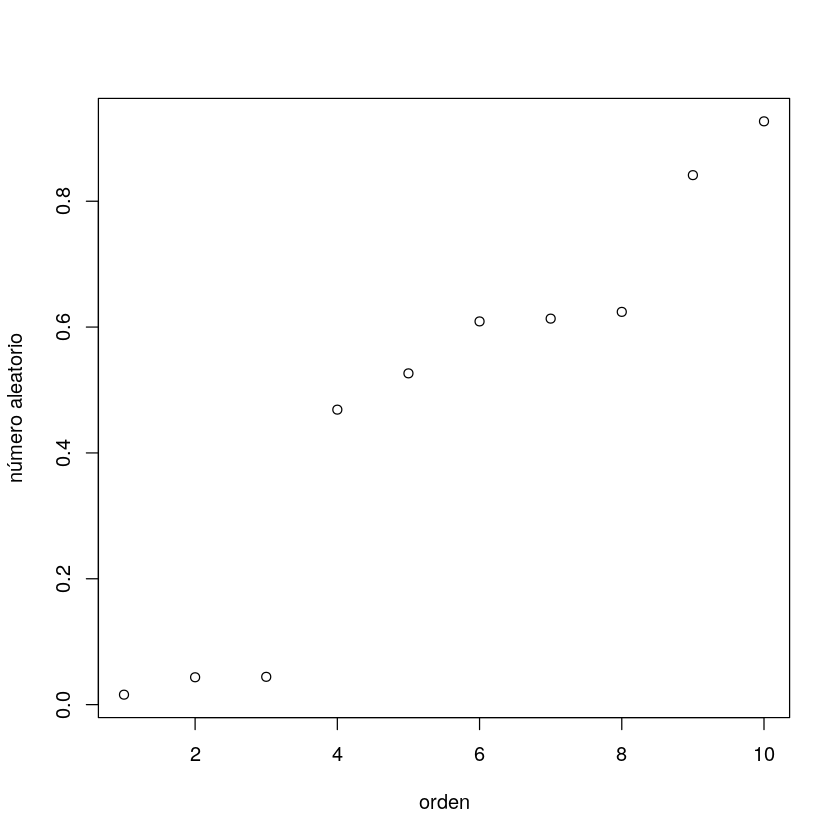

In [81]:
# ordenar un vector
va = runif(10)  # creo un vector de 10 números aleatorios (uniformemente distribuídos entre el 0 y el 1)
vao = sort(va)  # vector ordenado de menor a mayor
plot(vao, xlab = "orden", ylab = "número aleatorio")  # dibujo el vector

In [43]:
# secuencias
seq1 <- 1:10 
seq2 <- seq(0, 10, by = 2) 
seq3 <- seq(10, 0, by = -2) 

print(seq1)
print(seq2)
print(seq3)

 [1]  1  2  3  4  5  6  7  8  9 10
[1]  0  2  4  6  8 10
[1] 10  8  6  4  2  0


**Ejercicio**

Crea con las funciones `rep()` and `seq()` el siguiente vector: 11, 11, 11, 1, 2, 3, 4, 5, 7, 9, 11

In [45]:
# solución

[1] 11 11 11  1  2  3  4  5  7  9 11

In [46]:
# vector lógico
logi <- c(FALSE, TRUE)

# vector de caracteres (o strings)
char <- c("Hola","que","tal")

**¡Un vector sólamente puede contener un tipo atómico!** Cuando se combinan dos tipos atómicos en un único vector, R convertirá automáticamente uno de ellos al tipo del otro.

In [52]:
typeof(c(2, "Hola"))
typeof(c(FALSE, "Hola"))
typeof(c(FALSE, 2))

[1] "character"

[1] "character"

[1] "double"

Se puede comprobar de qué tipo es un vector dado con las funciones `is.character()`, `is.numeric()`, `is.integer()`... Se puede convertir el tipo de un vector a otro tipo con las funciones `as.character()`, `as.integer()`...

In [55]:
r <- c(1.1,2.2,3.3)

print(as.integer(r))
print(as.character(r))

is.character(as.character(r))

[1] 1 2 3
[1] "1.1" "2.2" "3.3"


[1] TRUE

**Ejercicio**  

Crea un vector 'v' que contenga una secuencia de enteros desde el 3 hasta el 10. Convierte 'v' a un vector de tipo caracter y comprueba de qué tipo es el vector resultante

In [58]:
# solución

In [64]:
# selección de subvectores (mediante corchetes `[]`)
x <- 10:15

print(x[1:2]) # selecciono los dos primeros elementos de x
print(x[c(1, length(x))]) # selecciono el primer y último elemento de x
print(x[-c(3, 5)]) # excluyo el tercer y quinto elementos

[1] 10 11
[1] 10 15
[1] 10 11 13 15


In [63]:
# selección de subvectores (mediante índices lógicos)
x <- 1:10
print(x)

# construcción de un vector lógico que indica qué elementos de x son mayores que 5 
y <- x > 5
print(y)
print(x[y])

# construcción de un vector lógico que indica qué elementos de x son par
z <- x %% 2 == 0
print(z)
# extraigo esos valores
print(x[z])

 [1]  1  2  3  4  5  6  7  8  9 10
 [1] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[1]  6  7  8  9 10
 [1] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
[1]  2  4  6  8 10


**Ejercicio** 

Crea un vector de caracteres con los nombres de 5 personas. 
Crea un subvector con las personas 2 y 4.
Ordena los nombres de tus amigos en orden alfabético inverso.

In [67]:
# solución

Los *missing values* se indican mediante `NA` (Not Available) o `NaN` (Not A Number). `NaN` caracteriza un valor que sale de una indeterminación matemática, por ejemplo 0/0. Los `NA` se pueden detectar con la función `is.na()`

In [89]:
# elimina los missing values del siguiente valor
x <- c(-1, -2, 1, 2, NA, 4, NA, log(pi), NA, 5, -6, -9, NA, NA)

# solución

In [90]:
# crea un nuevo vector que sólo contega los valore positivos de x (sin missing values)
x <- c(-5,-4,-3,-2,-1, NA, 1, 2, NA, 4,5)

# solución

### Matrices

Las matrices son generalizaciones bidimensionales (fila-columna) de los vectores:
* Se pueden crear con la función `matrix()`
* Llevan por defecto el atributo `dim`, al cual se puede acceder con las función `attributes()`
* Se pueden añadir otros atributos: `names`, `row.names`, `col.names`... 

Funciones utilizadas frecuentemente para el manejo de matrices:
`t()`, `diag()`, `det()`, `inv()`

**Ejercicio**

Utiliza las funciones `t()`, `diag()`,  `det()`, `inv()` con la matriz que se proporciona a continuación (objeto `mat`). ¿Qué hace cada una de estas funciones?

In [205]:
mat <- matrix(1:9, ncol = 3)

# solución

In [98]:
# crear una matriz vacía de 2x3 
m1 <- matrix(nrow = 2, ncol = 3)

print(m1)
dim(m1)

     [,1] [,2] [,3]
[1,]   NA   NA   NA
[2,]   NA   NA   NA


[1] 2 3

In [100]:
# crear una matriz numérica
m2 <- matrix(1:6, nrow = 2, ncol = 3, byrow = TRUE)

print(m2)
str(m2)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
 int [1:2, 1:3] 1 4 2 5 3 6
     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6
 int [1:2, 1:3] 1 2 3 4 5 6


In [101]:
# crear una matriz a partir de un vector
m3 <- 1:10

dim(m3) <- c(2,5) # establezco dimensiones: 2 filas, 5 columnas
print(m3)
class(m3)

     [,1] [,2] [,3] [,4] [,5]
[1,]    1    3    5    7    9
[2,]    2    4    6    8   10


[1] "matrix"

In [102]:
# crear una matriz por concatenación de vectores de igual longitud
x <- 1:3
y <- 10:12

# por columnas: `cbind()`
z1 <- cbind(x,y)
print(z1)

# por filas: `rbind()`
z2 <- rbind(x,y)
print(z2)

     x  y
[1,] 1 10
[2,] 2 11
[3,] 3 12
  [,1] [,2] [,3]
x    1    2    3
y   10   11   12


In [121]:
# asignación de etiquetas a las filas y columnas de una matriz
rownames(z2) = c("row1", "row2")
colnames(z2) = c("col1", "col2", "col3")
print(z2)

     col1 col2 col3
row1    1    2    3
row2   10   11   12


col1 col2 col3 
  10   11   12

[1] 12

In [108]:
# suma elemento a elemento 
M <- matrix(c(1,2,3,4), nrow = 2, byrow = TRUE)
print(M+2)

     [,1] [,2]
[1,]    3    4
[2,]    5    6


Si a una matriz se le suma un vector cuya longitud sea igual al número de filas de la matriz, se obtiene como resultado una nueva matriz cuyas columnas son la suma de las columnas de la matriz original más dicho vector.

In [109]:
v <- c(3,4)
print(M+v)

     [,1] [,2]
[1,]    4    5
[2,]    7    8


La suma o resta de matrices de la misma dimensión se realiza con los operadores `+` y `-`.

In [110]:
print(M+M)
print(M-M)

     [,1] [,2]
[1,]    2    4
[2,]    6    8
     [,1] [,2]
[1,]    0    0
[2,]    0    0


El producto de matrices (siempre que sean compatibles) se realiza con el símbolo `%*%`. El símbolo `*` denota el producto elemento a elemento.

In [111]:
print(M%*%M)  # multiplicación de matrices
print(M*M)    # multiplicación elemento a elemento

     [,1] [,2]
[1,]    7   10
[2,]   15   22
     [,1] [,2]
[1,]    1    4
[2,]    9   16


In [112]:
# selección de submatrices (mediante índices)
m <- matrix(1:9, nrow = 3, ncol = 3, byrow = TRUE)
print(m)

m[2, 3] # fila 2, columna 3
m[2, ] # fila 2 completa
m[ ,3]  # columna 3 completa
m[1, 2:3] # segundo y tercer elementos de la primera fila

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9


[1] 6

[1] 4 5 6

[1] 3 6 9

[1] 2 3

**Ejercicio**

* Crea un vector con 12 enteros 
* Convierte el vector a una matriz de tamaño 4x3
* Llama a las columnas de dicha matriz `x`, `y`, `z` y a las filas `a`, `b`, `c`, `d`.  
* Extrae la submatriz 3x3 formada por las tres últimas filas (`b`, `c`, `d`)

In [124]:
# solución

,x,y,z
b,2,6,10
c,3,7,11
d,4,8,12


In [125]:
# selección de submatrices (mediante vectores lógicos)
m <- matrix(1:9, nrow = 3, ncol = 3, byrow = TRUE)

m[m%%2 == 0] <- 0  
print(m)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9
     [,1] [,2] [,3]
[1,]    1    0    3
[2,]    0    5    0
[3,]    7    0    9


In [127]:
m <- matrix(1:9, nrow = 3, ncol = 3, byrow = TRUE)

ind <- which(m%%2 == 0) # devuelve los índices de los elementos par
print(ind)

m[ind] <- 0 # convierte los elementos de los índices indicados a 0
print(m)

[1] 2 4 6 8
     [,1] [,2] [,3]
[1,]    1    0    3
[2,]    0    5    0
[3,]    7    0    9


### Arrays
Un array es una colección de datos (por ejemplo numéricos) indexados. En otras palabras, los arryas son generalizaciones multi-dimensionales (en 3 o más dimensiones) de los vectores.

In [129]:
# creación de un array

# mediante `array`
a <- array(1:24, dim = c(2,3,4))
print(a)
class(a)
print(dim(a))

# mediante `dim`
x <- c(1:24)
dim(x) <- c(2,3,4) 
print(x)
class(x)
print(dim(x))

, , 1

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

, , 2

     [,1] [,2] [,3]
[1,]    7    9   11
[2,]    8   10   12

, , 3

     [,1] [,2] [,3]
[1,]   13   15   17
[2,]   14   16   18

, , 4

     [,1] [,2] [,3]
[1,]   19   21   23
[2,]   20   22   24



[1] "array"

[1] 2 3 4
, , 1

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

, , 2

     [,1] [,2] [,3]
[1,]    7    9   11
[2,]    8   10   12

, , 3

     [,1] [,2] [,3]
[1,]   13   15   17
[2,]   14   16   18

, , 4

     [,1] [,2] [,3]
[1,]   19   21   23
[2,]   20   22   24



[1] "array"

[1] 2 3 4


In [132]:
# selección de subarrays (mediante índices)
print(x[1,1,1]) # "aplano" las tres dimensiones
print(x[,,1]  ) # "aplano" la tercera dimensión
print(x[,2,1])  # "aplano" la segunda y tercera dimensiones

[1] 1
     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6
[1] 3 4


### Factores
Un factor es un vector utilizado para especificar una clasificación discreta de los elementos de otro vector de igual longitud. Un factor lleva dos atributos: `levels` y `class`, a los cuales se puede acceder mediante `levels()` y `class()`

In [133]:
# creación de un factor
ciudades <- c("San","Tor","Ovi","Ovi","San","Ovi","San","Tor","Ovi")

ciudadesf <- factor(ciudades)  # creo un factor a partir del vector dado
print(ciudadesf)

[1] San Tor Ovi Ovi San Ovi San Tor Ovi
Levels: Ovi San Tor


In [137]:
# atributos del factor creado
attributes(ciudadesf)

$levels
[1] "Ovi" "San" "Tor"

$class
[1] "factor"

In [141]:
# acceso a los atributos 
print(levels(ciudadesf))
print(class(ciudadesf))

[1] "Ovi" "San" "Tor"
[1] "factor"


[1] 3

[1] 3

ciudadesf
Ovi San Tor 
  4   3   2 

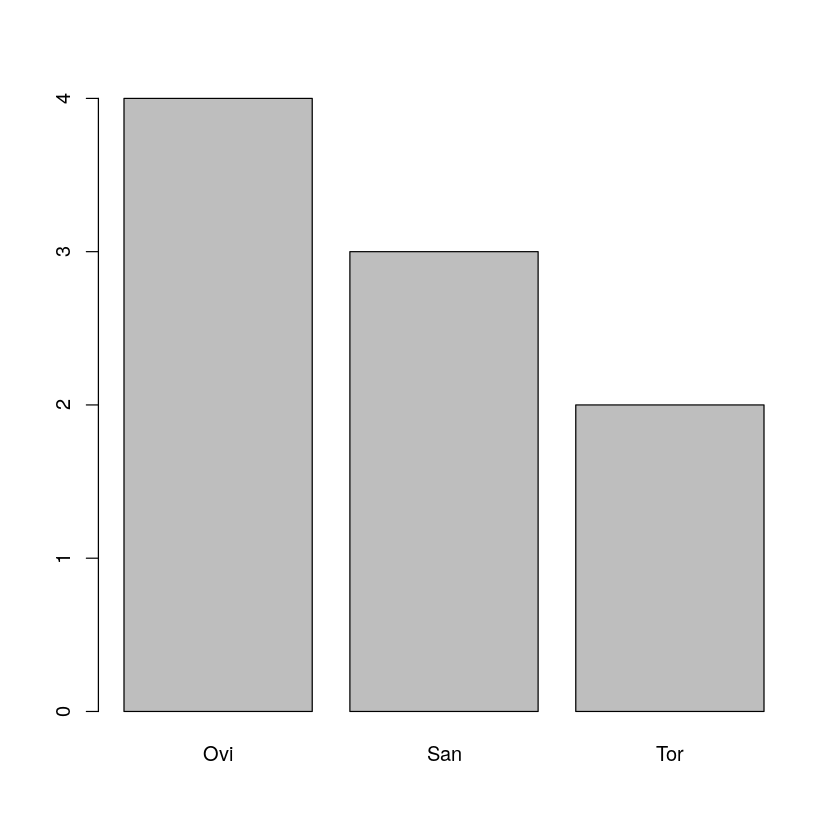

In [144]:
# ¿cuántas ciudades distintas hay en mi vector inicial?
length(levels(ciudadesf))  
table(ciudadesf)  # tabla resumen
plot(ciudadesf)  # histograma frecuencias

**Ejercicio**

* Crea a un vector que contenga 10 números enteros entre el 1 y el 5.  
* Convierte ese vector a un factor.
* Accede a los distintos niveles.  
* Haz una tabla de frequencias.

In [153]:
# solución

 [1] 4 4 5 4 2 4 4 4 2 2
 [1] 4 4 5 4 2 4 4 4 2 2
Levels: 2 4 5


vecf
2 4 5 
3 6 1 

### Listas
Una lista es una colección ordenada de objetos, que pueden ser de diferentes tipos (por ejemplo una combinación de vectores, matrices, factores, otras listas, data.frames, etc.). 

In [157]:
# crear una lista
list1 <- list("Pedro", "Pelayo", 3, c(4,7,9), matrix(1, nrow = 2, ncol = 3))
print(list1)

[[1]]
[1] "Pedro"

[[2]]
[1] "Pelayo"

[[3]]
[1] 3

[[4]]
[1] 4 7 9

[[5]]
     [,1] [,2] [,3]
[1,]    1    1    1
[2,]    1    1    1



In [159]:
# se le puede dar nombres a los elementos de una lista
list2 <- list(nombre = "Pedro", apellido = "Pelayo", no.hijos = 3, edad.hijos = c(4,7,9))
print(list2)

$nombre
[1] "Pedro"

$apellido
[1] "Pelayo"

$no.hijos
[1] 3

$edad.hijos
[1] 4 7 9



In [168]:
# selección de sublistas
list2[[1]]  # primer elemento de la lista
list2[[4]]  # cuarto elemento de la lista
list2[[4]][1]  # primer elemento dentro del cuarto elemento de la lista
list2$nombre  # acceso por etiquetas
list2$no.hijos  # acceso por etiquetas

[1] "Pedro"

[1] 4 7 9

[1] 4

[1] "Pedro"

[1] 3

### Data frames
Los data frames son estructuras muy versátiles que se usan para guardar tablas de datos (creadas o importadas). Un data frame lleva por defecto los atributos `names`, `row.names`, `class`

In [169]:
# creación de un data frame
edad <- c(22, 34, 29, 25, 30, 33, 31, 27, 25, 25)  # edad estudiantes
tiempo1 <- c(10.36, 14.21, 13.81, 11.89, 10.99, 12.03, 12.48, 13.37, 12.29, 11.92)  # primera carrera de 100 m.
tiempo2 <- c(11.38, 15.20, 14.91, 12.90, 12.03, 12.58, 13.00, 13.01, 14.54, 15.27)  # segunda carrera de 100 m.
sexo <- factor(c("M","H","H","M","M","H","M","M","H","H"))

df <- data.frame(edad, tiempo1, tiempo2, sexo) # data frame
df

edad,tiempo1,tiempo2,sexo
<dbl>,<dbl>,<dbl>,<fct>
22,10.36,11.38,M
34,14.21,15.20,H
29,13.81,14.91,H
25,11.89,12.90,M
30,10.99,12.03,M
33,12.03,12.58,H
31,12.48,13.00,M
27,13.37,13.01,M
25,12.29,14.54,H


In [170]:
# resumen acerca del data frame
str(df)    

'data.frame':	10 obs. of  4 variables:
 $ edad   : num  22 34 29 25 30 33 31 27 25 25
 $ tiempo1: num  10.4 14.2 13.8 11.9 11 ...
 $ tiempo2: num  11.4 15.2 14.9 12.9 12 ...
 $ sexo   : Factor w/ 2 levels "H","M": 2 1 1 2 2 1 2 2 1 1


Se puede acceder a las columnas de un data frame por su nombre y operar con ellas fácilmente.

In [171]:
df$totaltiempo <- df$tiempo1 + df$tiempo2
df

edad,tiempo1,tiempo2,sexo,totaltiempo
<dbl>,<dbl>,<dbl>,<fct>,<dbl>
22,10.36,11.38,M,21.74
34,14.21,15.20,H,29.41
29,13.81,14.91,H,28.72
25,11.89,12.90,M,24.79
30,10.99,12.03,M,23.02
33,12.03,12.58,H,24.61
31,12.48,13.00,M,25.48
27,13.37,13.01,M,26.38
25,12.29,14.54,H,26.83


Existen funciones de R que operan directamente sobre data frames. Estas funciones reconocen automáticamente los nombres de las columnas, los factores (si los hay), etc.

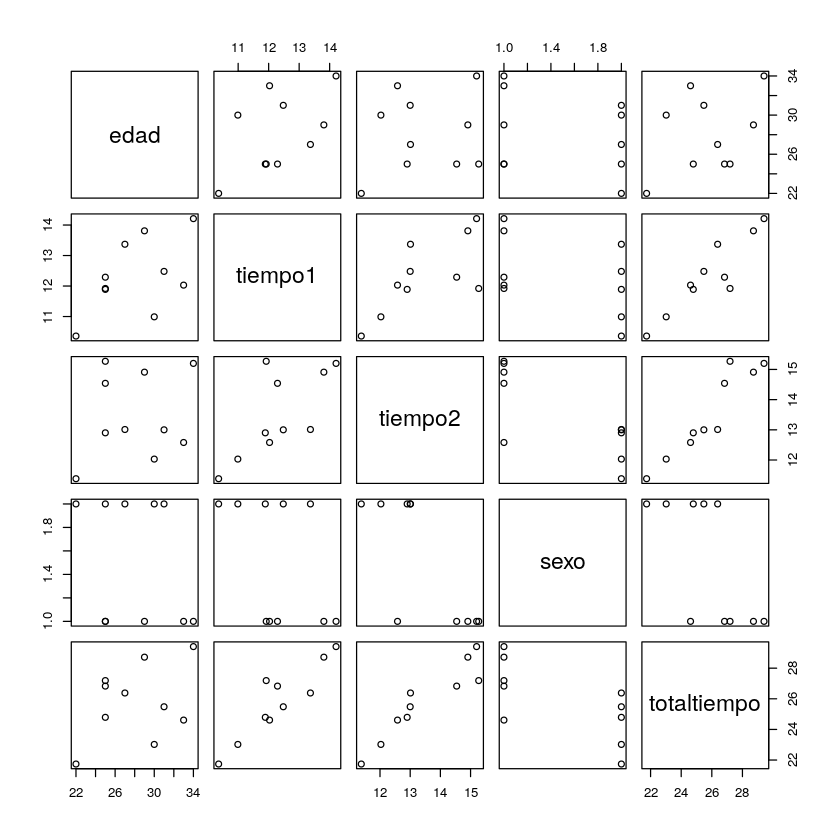

In [173]:
plot(df)  # scatter plot que enfrenta todas las variables entre sí

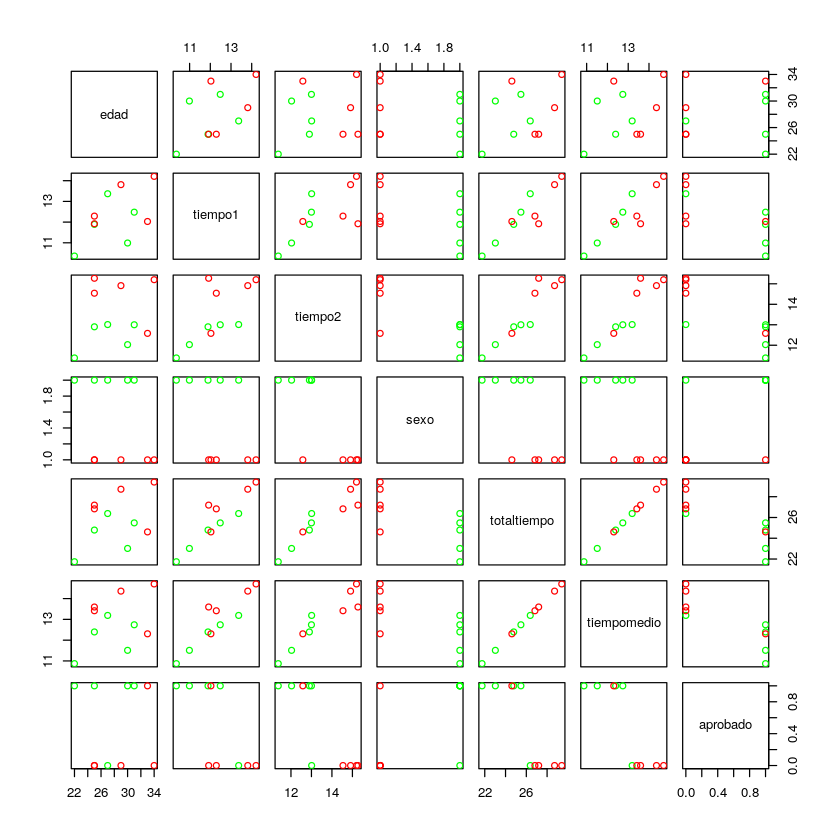

In [181]:
plot(df, col = c("red","green")[df$sexo]) # rojo = hombre, verde = mujer

**Ejercicio**

* Añade una nueva columna al data frame con la media de los tiempos empleados en las dos carreras. 
* Añade una nueva columna que indique si los estudiantes han aprobado el test: Tiempo medio < 13.  
* Dibuja la edad vs el tiempo medio.

edad,tiempo1,tiempo2,sexo,totaltiempo,tiempomedio,aprobado
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<lgl>
22,10.36,11.38,M,21.74,10.870,TRUE
34,14.21,15.20,H,29.41,14.705,FALSE
29,13.81,14.91,H,28.72,14.360,FALSE
25,11.89,12.90,M,24.79,12.395,TRUE
30,10.99,12.03,M,23.02,11.510,TRUE
33,12.03,12.58,H,24.61,12.305,TRUE
31,12.48,13.00,M,25.48,12.740,TRUE
27,13.37,13.01,M,26.38,13.190,FALSE
25,12.29,14.54,H,26.83,13.415,FALSE


edad,tiempo1,tiempo2,sexo,totaltiempo,tiempomedio,aprobado
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<lgl>
22,10.36,11.38,M,21.74,10.870,TRUE
34,14.21,15.20,H,29.41,14.705,FALSE
29,13.81,14.91,H,28.72,14.360,FALSE
25,11.89,12.90,M,24.79,12.395,TRUE
30,10.99,12.03,M,23.02,11.510,TRUE
33,12.03,12.58,H,24.61,12.305,TRUE
31,12.48,13.00,M,25.48,12.740,TRUE
27,13.37,13.01,M,26.38,13.190,FALSE
25,12.29,14.54,H,26.83,13.415,FALSE


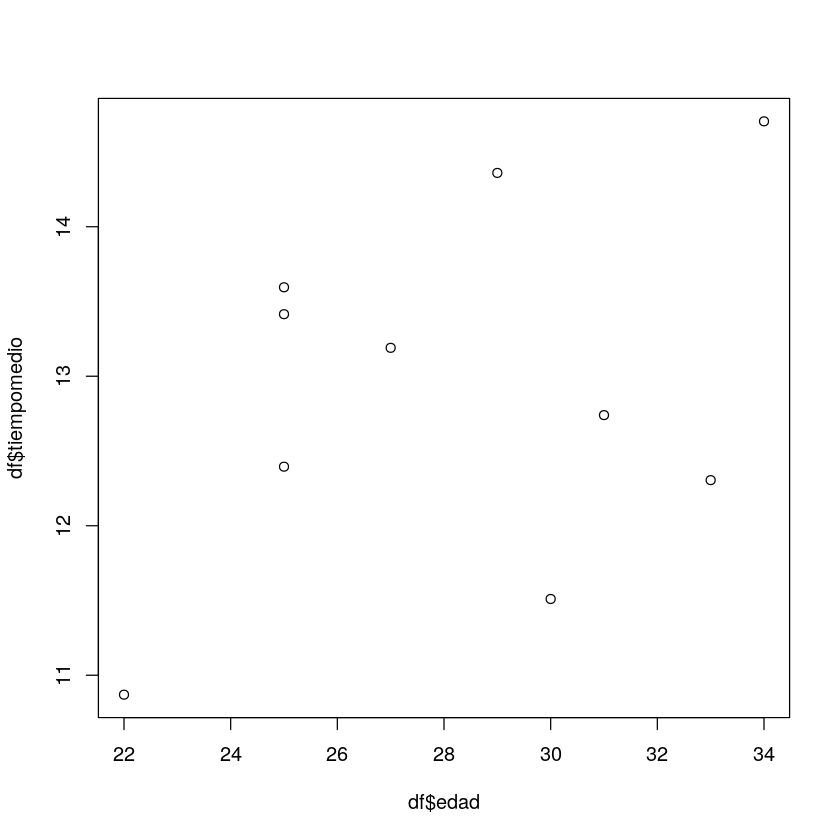

In [178]:
# solución

Las bases de datos o datasets (por ejemplo en formato excel o csv) se importan en R como data frames para análisis posteriores. R incluye por defecto una serie de datasets interesantes, por ejemplo `swiss` (datos sobre fertilidad y diversos factores socio-econónicos en 47 provincias suizas).

In [180]:
data(swiss)  # cargo en memoria el dataset swiss
?swiss  # obtengo información sobre el dataset
str(swiss)

'data.frame':	47 obs. of  6 variables:
 $ Fertility       : num  80.2 83.1 92.5 85.8 76.9 76.1 83.8 92.4 82.4 82.9 ...
 $ Agriculture     : num  17 45.1 39.7 36.5 43.5 35.3 70.2 67.8 53.3 45.2 ...
 $ Examination     : int  15 6 5 12 17 9 16 14 12 16 ...
 $ Education       : int  12 9 5 7 15 7 7 8 7 13 ...
 $ Catholic        : num  9.96 84.84 93.4 33.77 5.16 ...
 $ Infant.Mortality: num  22.2 22.2 20.2 20.3 20.6 26.6 23.6 24.9 21 24.4 ...


**Ejercicio**

* Busca en la ayuda del data frame (`swiss`) el ejemplo en que se hace una regresión lineal. Copia ese ejemplo.
* Trata de explicar la relacion existente entre la "Education" y "Examination" con un plot o una regresión lineal entre las dos variables.
* Convierte la variable `catholic` del data frame `swiss` en una variable categórica (por ejemplo de tipo lógico con la condicion > 55%). Posteriormente conviértela a factor. Haz una tabla de frequencias: ¿Como se ha dividido el país?
* Haz un nuevo data frame `swiss2` que sólo contenga las columnas "Fertility", "Agriculture" e "Infant.Mortality". 
* Dibuja un scatterplot de `swiss2`.


Call:
lm(formula = Examination ~ Education, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9322  -4.7633  -0.1838   3.8907  12.4983 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.12748    1.28589   7.876 5.23e-10 ***
Education    0.57947    0.08852   6.546 4.81e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.773 on 45 degrees of freedom
Multiple R-squared:  0.4878,	Adjusted R-squared:  0.4764 
F-statistic: 42.85 on 1 and 45 DF,  p-value: 4.811e-08


[1] "logical"

catholicf
FALSE  TRUE 
   30    17 

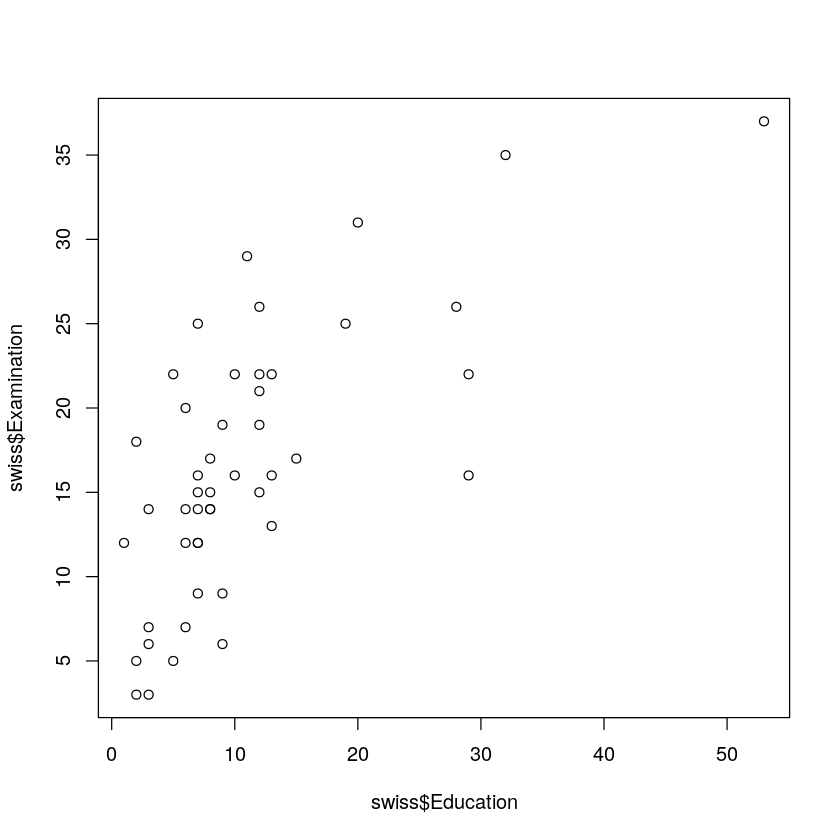

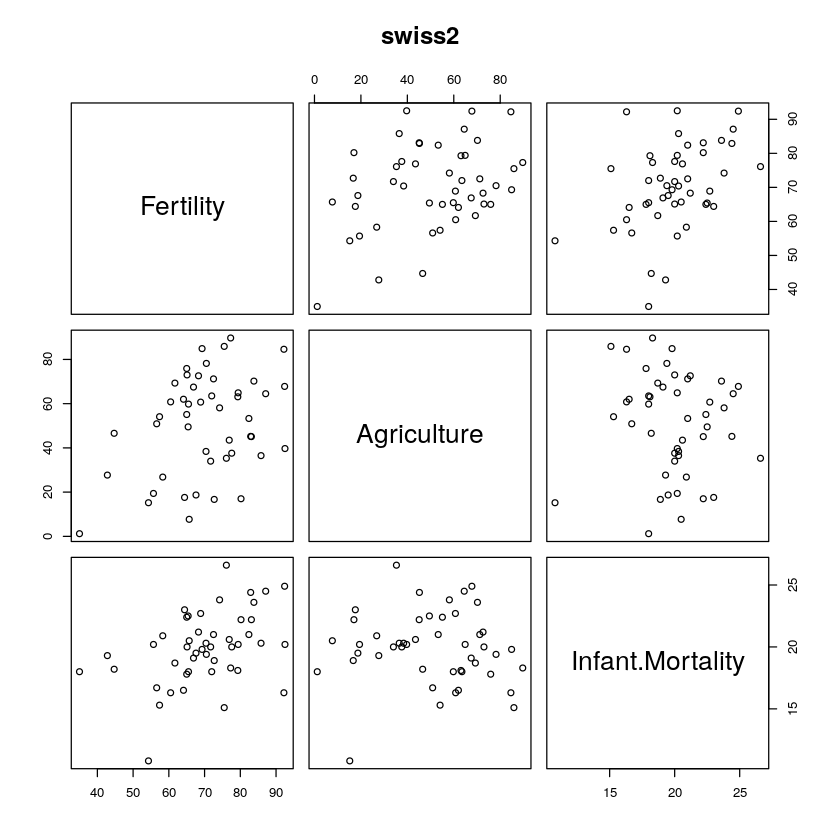

In [182]:
# solución

summary(lm(Examination ~ Education, data = swiss))
plot(swiss$Examination ~ swiss$Education)

catholic.log <- swiss$Catholic > 55 # Convierte
class(catholic.log) 
catholicf <- factor(catholic.log)
table(catholicf)

swiss2 <- swiss[c("Fertility", "Agriculture", "Infant.Mortality")]
pairs(swiss2, main = "swiss2")

### Funciones
Las funciones permiten realizar operaciones sobre objetos de una manera estructurada. La forma básica de definir una función (por ejemplo, *function.name*) en R es la siguiente:

```{r}
function.name <- function(arg1, arg2, ..., argN) {
# statements
}
```
 
*arg1, ..., argN* son las variables y/o argumentos de entrada que necesita la función
    
    
La forma de llamar a esta función sería tal que así:

```{r}
res <- function.name(arg1, arg2, ..., argN)
```
     
*res* es la variable de salida que devuelve la función como resultado de las operaciones hechas sobre las variables de entrada.

In [184]:
# es posible definir una función sin ninguna variable de entrada (aunque no tiene mucho sentido)

# función "sin función"
hello <- function() {
 print("Hello world")
}
hello()

[1] "Hello world"


In [186]:
# calcula la suma de dos números
fun.sum <- function(x, y) {
 return(x + y)
}
fun.sum(5, 7)

[1] 12

In [187]:
# cálculo del máximo y el mínimo de un vector
max.min <- function(x) {
 return(c(min(x), max(x)))
}

vec <- 1:100
max.min(vec)

[1]   1 100

**Ejercicio**

Construye una función llamada *IMC* que calcule el *Indice de Masa Corporal* a partir del peso (en kg) y la altura (en m). IMC = peso/altura^2.

In [188]:
peso = c(55, 63, 77, 82, 61, 75, 92)
altura = c(1.60, 1.73, 1.71, 1.75, 1.58, 1.72, 1.81)

# solución

Hay variables de entrada que son obligatorias y otras que son opcionales. Por ejemplo, la función *log* tiene una variable de entrada obligatoria (el número del cual se desea calcular el logaritmo) y otra opcional (si no se especifica lo contrario, se calcula el logaritmo natural, es decir, en base *e*).

In [193]:
log(exp(1))
log(exp(1), base = 2)

[1] 1

[1] 1.442695

In [194]:
# esta función, por ejemplo, admite un argumento de entrada opcional ("operator"), que puede tomar los valores "power" o "divide".
# función para realizar operaciones (elevar al cuadrado o dividir) sobre dos números

operate.2num = function(x, y, operator = NULL) {
    if (is.null(operator)) {
        return(c(x, y))
    } else if (operator == "power") {
        return(x^y)
    } else if (operator == "divide") {
        return(x/y)
    }
}
operate.2num(10, 2)
operate.2num(10, 2, "power")
operate.2num(10, 2, "divide")

[1] 10  2

[1] 100

[1] 5

**Ejercicio**
 
Modifica la función anterior (*operate.2num*) para que:
 * Permita también calcular el logaritmo de "x" en base "y"
 * En el caso de la operación "power" sea el mayor de los dos números el que se eleve al menor

In [195]:
# solución

La ayuda de una función en R se puede obtener mediante los comandos `?` y `help()`, y se estructura en varias secciones:
   +  **Description**: breve descripción de lo que hace la función.  
   +  **Usage**: sintaxis de la función.
   +  **Arguments**: explicación de los argumentos que recibe la función.
   +  **Value**: explicación del objeto que devuelve la función. El objeto devuelto puede ser un valor, una lista, una matriz, …
   +  **References**: bibliografía relacionada con los métodos implementados en la función.
   +  **See Also**: funciones relacionadas.
   +  **Examples**: esta es sin duda la sección más importante ya que muestra ejemplos efectivos del uso de la función.

In [196]:
?mean()
help(mean)

Si queremos utilizar una función que no recordamos (o no conocemos), pero de la que sabemos (o sospechamos) que su nombre contiene el término *mean*, podemos utilizar *apropos("mean")*, que nos devuelve un listado de funciones que contienen dicho témino en su nombre.

In [197]:
apropos("mean")

[1] ".colMeans"     ".rowMeans"     "colMeans"      "kmeans"       
 [5] "mean"          "mean.Date"     "mean.default"  "mean.difftime"
 [9] "mean.POSIXct"  "mean.POSIXlt"  "rowMeans"      "weighted.mean"

## Librerías en R

* La instalación básica de R viene equipada con múltiples funciones para análisis estadístico, importación de datos, gráficos, etc. Sin embargo, puede ocurrir que necesitemos llevar a cabo un análisis muy específico para el cual no encontremos las funciones adecuadas. En ese caso, la gran ventaja de R radica en que, en la práctica, casi siempre será posible encontrar un paquete (ó librería) que ya haya sido diseñado para el fin que perseguimos.
* Un paquete es una colección de funciones y/o datos con un propósito concreto (normalmente bastante específico) que se almacenan en una carpeta conforme a una estructura bien definida, fácilmente entendible por R.
* En la web de R se puede consultar la lista de paquetes disponibles (actualmente, más de 16000): https://cran.r-project.org/web/packages/. En la sección Task Views (https://cran.r-project.org/web/views/) se puede consultar una lista de paquetes ordenada según áreas de aplicación.

In [200]:
# el comando `library()` abre una ventana con información sobre los paquetes instalados
library()

Warning message in library():
“libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages”

In [201]:
# podemos ver un listado completo de los paquetes actualmente cargados en memoria con el comando `search()`
search()

[1] ".GlobalEnv"        "jupyter:irkernel"  "package:stats"    
 [4] "package:graphics"  "package:grDevices" "package:utils"    
 [7] "package:datasets"  "package:methods"   "Autoloads"        
[10] "package:base"

Para poder usar un paquete es necesario instalarlo y después cargarlo en memoria (comando `library`).
  
 + Instalación de librerías:
     + CRAN 
     + GitHub (hay que instalar antes el paquete "devtools")
     + Local

In [ ]:
## installing from CRAN ##

# R.matlab package (https://cran.r-project.org/web/packages/R.matlab/index.html)
# R.matlab provides methods for controlling MATLAB via R and sending and retrieving data between R and MATLAB
install.packages("R.matlab")

# la primera vez que se instale un paquete, R  preguntará el país desde dónde se desea descargar
# (es aconsejable hacerlo desde un mirror español) 

# una vez instalado no se necesitará instalarlo más, pero hay que cargarlo en memoria para poder usarlo
library(R.matlab)
existsFunction("writeMat")

In [ ]:
## installing from GitHub ##

# instalamos primero el paquete devtools: https://cran.r-project.org/web/packages/devtools/index.html
install.packages("devtools")
library(devtools)

install_github("HenrikBengtsson/R.matlab@develop")
library(R.matlab)

In [202]:
## instalación local ##

# tendremos que haber descargado antes el paquete de interés, comprimido en formato .tar.gz
install.packages(".../paquete.tar.gz", type = "source")
library(paquete)

Installing package into ‘/home/rodrigo/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
inferring 'repos = NULL' from 'pkgs'
Warning message in install.packages("./pathLocal/paquete.tar.gz", type = "source"):
“installation of package ‘./pathLocal/paquete.tar.gz’ had non-zero exit status”

ERROR: Error in library(paquete): there is no package called ‘paquete’


En ocasiones se hace necesario eliminar de la memoria algún paquete que hemos cargado previamente (por ejemplo, porque deseamos cargar una versión que acabamos de actualizar). Para ello basta con ejecutar el comando *detach*

In [ ]:
detach("package:R.matlab")

Si queremos eliminar del disco duro un paquete que tengamos instalado, basta ejecutar la función *remove.packages*

In [ ]:
# remove.packages("R.matlab")

Para ver un listado de todos los paquetes que tenemos en nuestro ordenador que pueden ser actualizados

In [203]:
old.packages()

,Package,LibPath,Installed,Built,ReposVer,Repository
akima,akima,/home/rodrigo/R/x86_64-pc-linux-gnu-library/3.6,0.6-2,3.6.0,0.6-2.1,https://cloud.r-project.org/src/contrib
backports,backports,/home/rodrigo/R/x86_64-pc-linux-gnu-library/3.6,1.1.5,3.6.1,1.1.10,https://cloud.r-project.org/src/contrib
BH,BH,/home/rodrigo/R/x86_64-pc-linux-gnu-library/3.6,1.69.0-1,3.6.1,1.72.0-3,https://cloud.r-project.org/src/contrib
broom,broom,/home/rodrigo/R/x86_64-pc-linux-gnu-library/3.6,0.5.5,3.6.3,0.7.1,https://cloud.r-project.org/src/contrib
C50,C50,/home/rodrigo/R/x86_64-pc-linux-gnu-library/3.6,0.1.2,3.6.1,0.1.3.1,https://cloud.r-project.org/src/contrib
car,car,/home/rodrigo/R/x86_64-pc-linux-gnu-library/3.6,3.0-4,3.6.1,3.0-10,https://cloud.r-project.org/src/contrib
carData,carData,/home/rodrigo/R/x86_64-pc-linux-gnu-library/3.6,3.0-2,3.6.1,3.0-4,https://cloud.r-project.org/src/contrib
caret,caret,/home/rodrigo/R/x86_64-pc-linux-gnu-library/3.6,6.0-84,3.6.1,6.0-86,https://cloud.r-project.org/src/contrib
caTools,caTools,/home/rodrigo/R/x86_64-pc-linux-gnu-library/3.6,1.17.1.2,3.6.1,1.18.0,https://cloud.r-project.org/src/contrib
classInt,classInt,/home/rodrigo/R/x86_64-pc-linux-gnu-library/3.6,0.4-2,3.6.1,0.4-3,https://cloud.r-project.org/src/contrib


Para actualizar dichos paquetes:

In [ ]:
# update.packages()

Finalmente, podemos querer cargar una función que hayamos creado nosotros mismos o hayamos descargado en local, pero que no sea una librería. Para ello tenemos que usar el comando `source`. El problema de este comando es que **hay que volver a aplicarlo siempre que hagamos un cambio en la funcion que queramos utilizar**.

In [ ]:
source(".../show.name.R")  # cargamos la función en memoria
show.name("Pelayo")  # ya podemos utilizar la función